# WMCA-DA-Project1 Retail Data Analysis 

# User Story
As a business analyst for a national retail chain, I want to analyse historical sales data across multiple stores and departments, so that I can identify trends, evaluate the impact of promotional markdowns, and provide actionable insights to support strategic decisions during holiday and non-holiday periods.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import required libraries for project



### Load the datasets from the Retail Data Analytics dataset on Kaggle
[link to dataset on kaggle](https://www.kaggle.com/datasets/manjeetsingh/retaildataset?resource=download)

In [10]:
sales_df = pd.read_csv("../data/sales_dataset.csv")
features_df = pd.read_csv("../data/features_dataset.csv")
stores_df = pd.read_csv("../data/stores_dataset.csv")
# Load the datasets

In [ ]:
sales_df # Sales data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [12]:
features_df # Features data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [13]:
stores_df # Stores data

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


### Convert Dates in 'Sales' and 'Features' Datasets
We will do this using the 'pd.to_datetime' method. 

In [ ]:
# Covert the date column to datetime format

sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)
features_df['Date'] = pd.to_datetime(features_df['Date'], dayfirst=True)

# Added 'dayfirst=True' to ensure the day is interpreted correctly

### Now we want to merge the datasets into one DataFrame.
This will help us identify any missing values or features required for engineering purposes.
It will also allow us to have all relevant data in one place. 
Our First step is to merge the 'sales' dataset with the 'stores' dataset.
Doing this will add 'Type' and 'Size' to each 'Sales' row. 

In [19]:
merged_df = sales_df.merge(stores_df, on='Store', how='left')

We check to ensure that this has happened as we expected:

In [20]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


### Next, we merge with our 'features_dataset.csv'
Passing the 'features_df' to our merged_df, we will use 'Store', 'Date', and 'IsHoliday' as keys for the merge. 

In [21]:
merged_df = merged_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

Now we quickly check to ensure things turn out as expected:

In [22]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


Now we have all of our raw data in one DataFrame! 
Time for us to check for any missing data, duplicates or mismatches.

In [23]:
merged_df.info()
# Check for missing values in the merged DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [ ]:
merged_df.isnull().sum()
# Checking for NaN values in the merged DataFrame

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

We can see that the 'Markdown' columns have lots of missing values.
This is to be expected due to the fact that markdown promotions wouldn't be running across all stores at all times. 
It would be helpful at this stage to transform the Null values to 0, indicating the absence of markdown promotions. 

In [25]:
# Transform Null Markdown values to 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'] # we pass the columns that have markdown values to a variable for clarity.
merged_df[markdown_cols] = merged_df[markdown_cols].fillna(0) # Fill NaN values with 0 in markdown columns

Now let's check for our missing values again...

In [26]:
merged_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

We can now see that there are no missing values in the merged DataFrame.

In [ ]:
merged_df # Check the data types of the merged DataFrame

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


It would be prudent at this stage to check for duplicate entries, either caused by merging, or were there already in our dataset.

In [28]:
merged_df.duplicated().sum()
# Check for duplicate rows in the merged DataFrame

0

We can see that our duplicate check returns as 0. 
Thankfully, this means that we do not need to remove any duplicated data.

### Feature Engineering
At this point, it's unclear as to the meaning of the 5 different 'Markdown' Columns. 
We are operating under the assumption that these represent the amount of revenue lost via discount per markdown campaign in USD ($) per store.

Next, we can add a column to our data representing that total Markdown Values for each store. 
This might be helpful when it comes to our analysis later on. It also helps us to quantify the intensity of the markdowns.

In [30]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'] # List of markdown columns to sum
merged_df['Total_MarkDown'] = merged_df[markdown_cols].sum(axis=1) # Create a new column 'Total_MarkDown' that sums the markdown columns

Now we check that this has worked:

In [31]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Total_MarkDown
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.00
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0.00
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0.00
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0.00
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,9468.01
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,9659.00
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,6554.03
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,3982.42


It's not clear at this stage that we should be dropping any columns for our analysis.
It seems like it would be salient at this point to export our cleaned and modified dataset to a new file. 

In [ ]:
merged_df.to_csv('../data/clean_retail_data.csv', index=False)
# Save the cleaned DataFrame to a new CSV file

### Initial Exploratory Data Analysis 
Now that we have our cleaned data, we can now conduct some exploratory analysis.
Let's load our clean data first:

In [35]:
df = pd.read_csv('../data/clean_retail_data.csv', parse_dates=['Date'])

We pass the 'parse_dates=['Date'] argument to ensure that our datetime format remains.

In [ ]:
df # Display the cleaned DataFrame

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Total_MarkDown
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.00
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0.00
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0.00
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0.00
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,9468.01
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,9659.00
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,6554.03
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,3982.42


Firstly, we would like to understand the average weekly sales by store.

In [45]:
avg_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
avg_sales_per_store.head(10)  # Show top 10 performing stores

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
10    26332.303819
27    24826.984536
6     21913.243624
1     21710.543621
39    21000.763562
Name: Weekly_Sales, dtype: float64

At this point we can visualise the data in a bar plot to clearly illustrate average weekly performance by Store.

C:\Users\hidde\AppData\Local\Temp\ipykernel_21800\764335952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_per_store.index, y=avg_sales_per_store.values, palette='viridis')


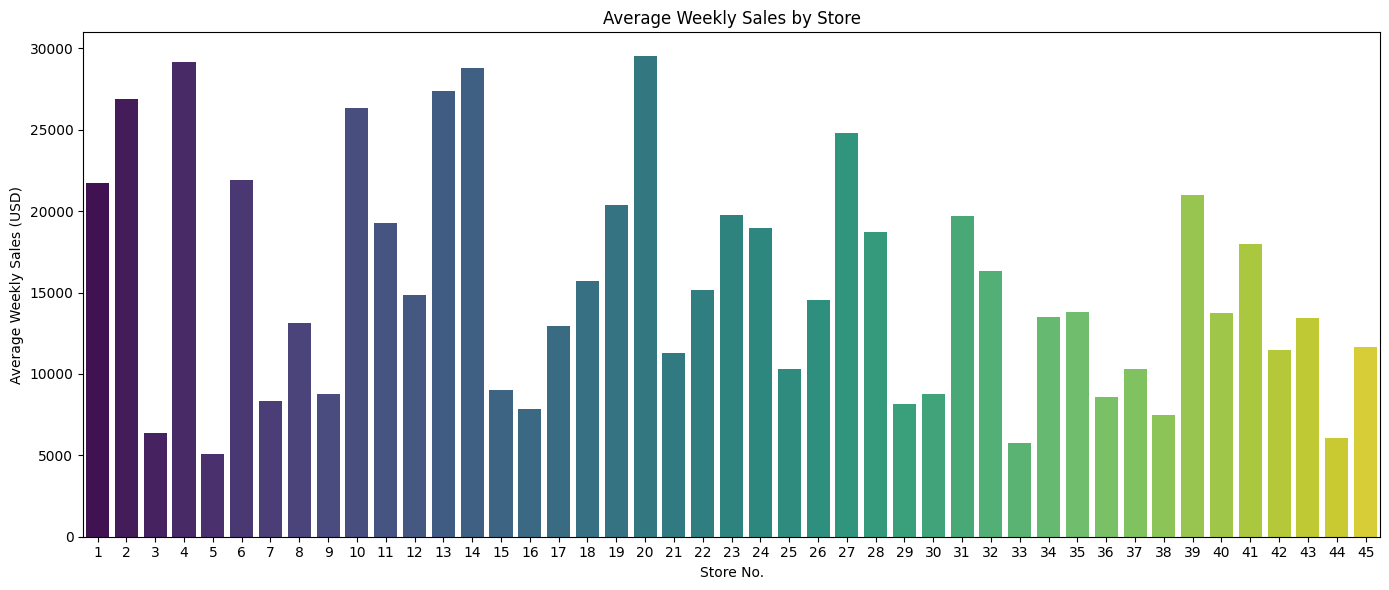

In [48]:
plt.figure(figsize=(14,6))
sns.barplot(x=avg_sales_per_store.index, y=avg_sales_per_store.values, palette='viridis')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store No.')
plt.ylabel('Average Weekly Sales (USD)')
plt.tight_layout()
plt.show()